In [18]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('sample_image.jpg')

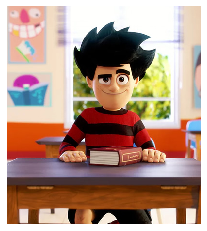

In [19]:
img = img[:,250:650,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [43]:
img.shape

(450, 400, 3)

In [20]:
X = img.reshape((-1,3))
print(X.shape)

(180000, 3)


In [50]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
centers = km.cluster_centers_

In [52]:
print(centers)

[[ 40.30998822  25.88753555  22.00008618]
 [247.38233843 245.63774755 245.35379519]
 [154.88167713  58.06443643  17.05003212]
 [151.46939    126.90071442 118.40300421]
 [225.4673749  206.0689613  184.79688838]]


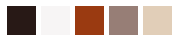

In [53]:
import numpy as np
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)

    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    
plt.show()
    

In [54]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([34761, 28358, 40515, 27312, 49054], dtype=int64))

In [55]:
# Repaint the Original Image
labels = km.labels_

In [82]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img.shape)

(180000, 3)


In [83]:
new_img = new_img.reshape(img.shape)

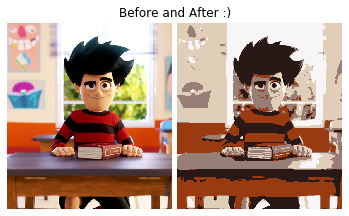

In [84]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((450,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()